<a href="https://colab.research.google.com/github/shreespace/Portfolio-Optimization/blob/main/Portfolio_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Portfolio Optimization


This project is about Portfolio Optimization using the Markowitz Model (also called Modern Portfolio Theory or MPT). The idea is to find the best mix of stocks that gives you:

📈 Maximum return

⚖️ Minimum risk

⭐ Best Sharpe Ratio (which tells how good the return is for the amount of risk taken)

We simulate 1,00,000 random portfolios to find the best combinations.





# **Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install yfinance
import yfinance as yf

# **Setting Parameters and Stock List**
We are analyzing stock data from 2013-10-01 to 2023-10-01

Number of trading days = 252

Stocks we’re considering: RELIANCE, TCS, HINDUNILVR, HDFCBANK, ITC, LT, INFY

In [17]:
NUM_TRADING_DAYS = 252
NUM_SIMULATIONS = 100000

stocks = ["RELIANCE.NS", "TCS.NS", "HINDUNILVR.NS", "HDFCBANK.NS", "ITC.NS", "LT.NS", "INFY.NS"]

start_date = "2013-10-01"
end_date = "2023-10-01"

stock_data = {}
for stock in stocks:
    ticker = yf.Ticker(stock)
    stock_data[stock] = ticker.history(start=start_date, end=end_date)['Close']

stock_prices = pd.DataFrame(stock_data)
stock_prices.head()

,RELIANCE.NS,TCS.NS,HINDUNILVR.NS,HDFCBANK.NS,ITC.NS,LT.NS,INFY.NS
Date,,,,,,,
2013-10-01 00:00:00+05:30,185.877930,797.869568,508.114166,277.475861,166.917297,465.993622,286.020508
2013-10-03 00:00:00+05:30,191.648071,828.796997,500.277649,288.612976,164.849091,482.682007,288.121704
2013-10-04 00:00:00+05:30,193.333847,832.481323,497.897949,290.540985,165.384399,477.585205,286.153320
2013-10-07 00:00:00+05:30,190.991852,855.466797,501.467499,287.751038,165.481689,471.323425,286.670349
2013-10-08 00:00:00+05:30,191.195511,843.882080,500.277649,287.002502,169.180161,482.536316,287.837097


# **Calculating Daily Returns**
We calculate the daily log returns to normalize percentage change

In [22]:
log_returns = np.log(stock_prices / stock_prices.shift(1))
log_returns = log_returns.dropna()
log_returns.head()


,RELIANCE.NS,TCS.NS,HINDUNILVR.NS,HDFCBANK.NS,ITC.NS,LT.NS,INFY.NS
Date,,,,,,,
2013-10-03 00:00:00+05:30,0.030571,0.038030,-0.015543,0.039353,-0.012468,0.035186,0.007319
2013-10-04 00:00:00+05:30,0.008758,0.004436,-0.004768,0.006658,0.003242,-0.010615,-0.006855
2013-10-07 00:00:00+05:30,-0.012188,0.027236,0.007144,-0.009649,0.000588,-0.013198,0.001805
2013-10-08 00:00:00+05:30,0.001066,-0.013635,-0.002376,-0.002605,0.022104,0.023512,0.004062
2013-10-09 00:00:00+05:30,0.018701,0.014161,0.000902,0.025747,0.002585,0.020018,0.024644


# **Calculating Annualized Return and Volatility of Each**

In [23]:
print("Annualised Return for each stock:")
print(log_returns.mean() * NUM_TRADING_DAYS)

print("\nVolatility (Risk) for each stock:")
print(np.std(log_returns) * np.sqrt(NUM_TRADING_DAYS))


Annualised Return for each stock:
RELIANCE.NS      0.187943
TCS.NS           0.148877
HINDUNILVR.NS    0.157892
HDFCBANK.NS      0.171786
ITC.NS           0.093352
LT.NS            0.189424
INFY.NS          0.160441
dtype: float64

Volatility (Risk) for each stock:
RELIANCE.NS      0.278528
TCS.NS           0.241961
HINDUNILVR.NS    0.225872
HDFCBANK.NS      0.227257
ITC.NS           0.256098
LT.NS            0.274147
INFY.NS          0.268291
dtype: float64


/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:3800: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


#**Monte Carlo Simulation for Random Portfolios**
We generate 1,00,000 portfolios by:
-Assigning random weights to each stock
-Calculating their expected return and risk
-Calculating the Sharpe Ratio

In [25]:
portfolio_weights = []
portfolio_returns = []
portfolio_risk = []

for _ in range(NUM_SIMULATIONS):
    weights = np.random.random(len(stocks))
    weights /= np.sum(weights)

    portfolio_weights.append(weights)

    expected_return = np.sum(log_returns.mean() * weights) * NUM_TRADING_DAYS
    expected_risk = np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * NUM_TRADING_DAYS, weights)))

    portfolio_returns.append(expected_return)
    portfolio_risk.append(expected_risk)

portfolio_weights = np.array(portfolio_weights)
portfolio_returns = np.array(portfolio_returns)
portfolio_risk = np.array(portfolio_risk)

portfolios = pd.DataFrame({
    "Returns": portfolio_returns,
    "Risk": portfolio_risk,
    "Sharpe Ratio": portfolio_returns / portfolio_risk
})
portfolios


,Returns,Risk,Sharpe Ratio
0,0.159988,0.164704,0.971367
1,0.167757,0.163372,1.026840
2,0.148567,0.157608,0.942635
3,0.152949,0.165618,0.923500
4,0.158913,0.164071,0.968562
...,...,...,...
99995,0.162381,0.177749,0.913544
99996,0.153348,0.163181,0.939737
99997,0.161049,0.158659,1.015066
99998,0.171557,0.168580,1.017660


# **Plotting All Portfolios**

---



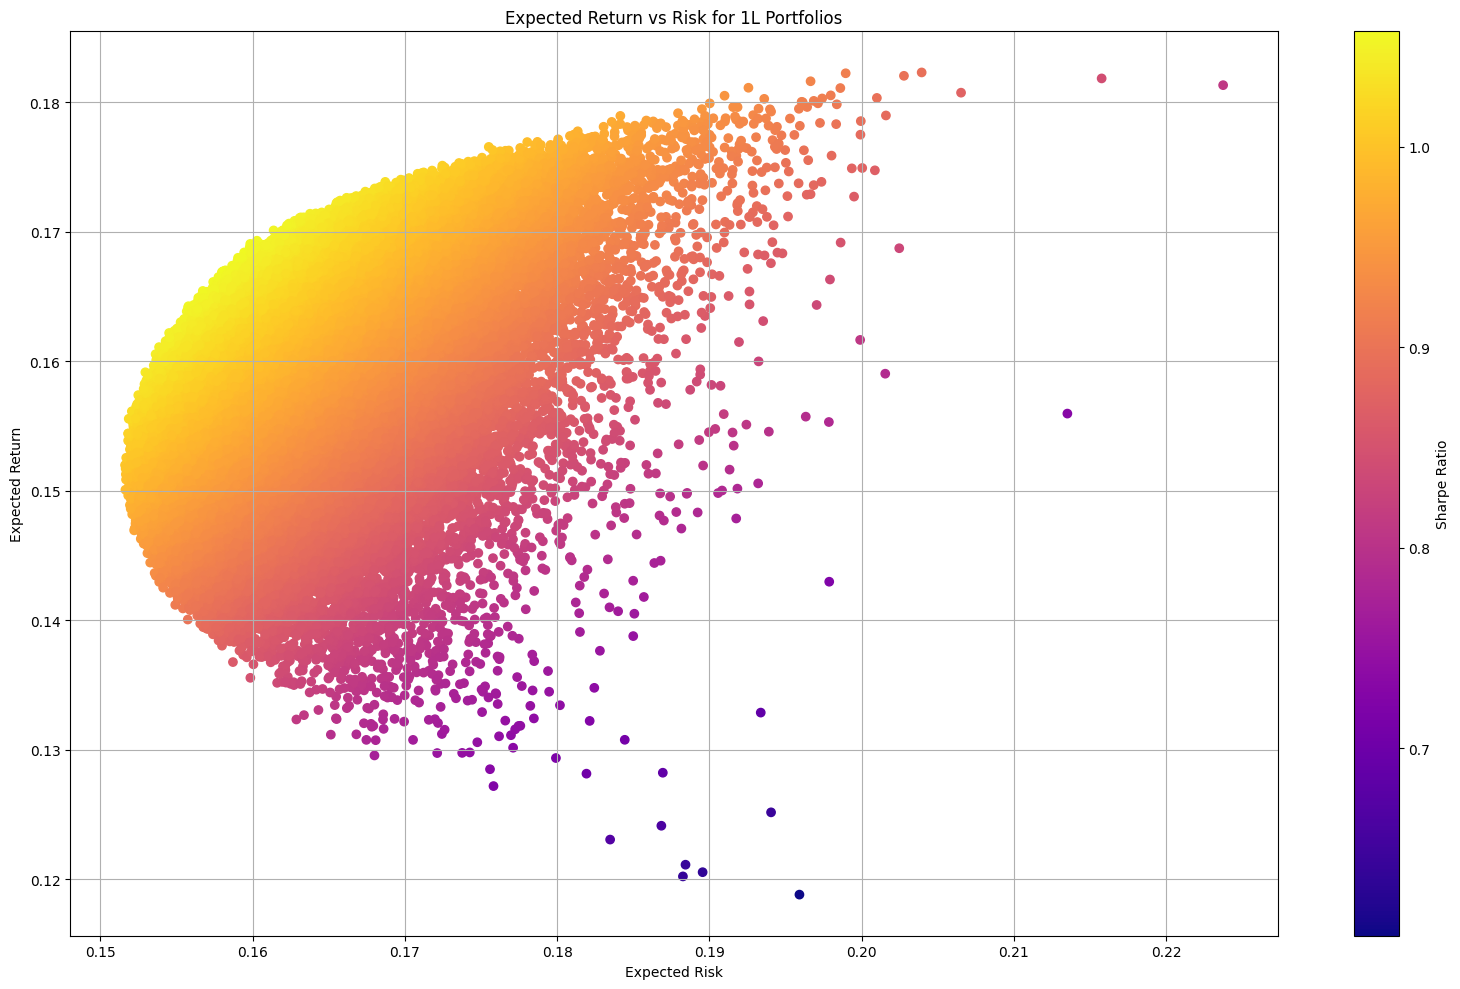

In [26]:
plt.figure(figsize=(16, 10))
plt.scatter(portfolio_risk, portfolio_returns, c=portfolios['Sharpe Ratio'], cmap='plasma', marker='o')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Expected Risk')
plt.ylabel('Expected Return')
plt.title('Expected Return vs Risk for 1L Portfolios')
plt.grid(True)
plt.tight_layout()
plt.show()


# **Portfolio with Maximum Sharpe Ratio**

In [27]:
max_sharpe_index = portfolios['Sharpe Ratio'].idxmax()

print("Portfolio with Max Sharpe Ratio:")
print("Sharpe Ratio:", np.round(portfolios.iloc[max_sharpe_index]['Sharpe Ratio'], 5))
print("Expected Return:", np.round(portfolios.iloc[max_sharpe_index]['Returns']*100, 2), "%")
print("Expected Risk:", np.round(portfolios.iloc[max_sharpe_index]['Risk'], 5))
print("Stock Weights:")
for i in range(len(stocks)):
    print(f"{stocks[i]} --> {np.round(portfolio_weights[max_sharpe_index][i], 5)}")


Portfolio with Max Sharpe Ratio:
Sharpe Ratio: 1.05767
Expected Return: 16.91 %
Expected Risk: 0.15985
Stock Weights:
RELIANCE.NS --> 0.15116
TCS.NS --> 0.14395
HINDUNILVR.NS --> 0.24047
HDFCBANK.NS --> 0.20951
ITC.NS --> 0.00516
LT.NS --> 0.16265
INFY.NS --> 0.08711


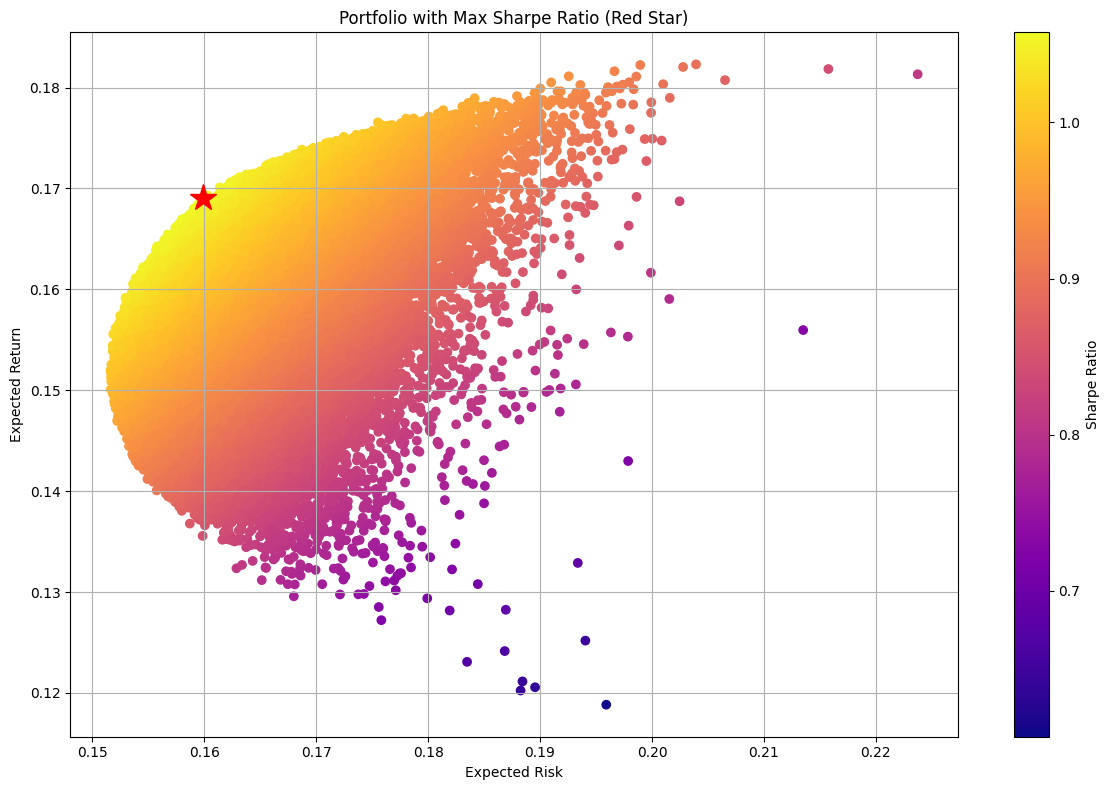

In [28]:
plt.figure(figsize=(12, 8))
plt.scatter(portfolio_risk, portfolio_returns, c=portfolios['Sharpe Ratio'], cmap='plasma')
plt.plot(portfolio_risk[max_sharpe_index], portfolio_returns[max_sharpe_index], 'r*', markersize=20)
plt.xlabel('Expected Risk')
plt.ylabel('Expected Return')
plt.title('Portfolio with Max Sharpe Ratio (Red Star)')
plt.colorbar(label='Sharpe Ratio')
plt.grid(True)
plt.tight_layout()
plt.show()


# **Portfolio with Minimum Risk**

In [30]:
min_risk_index = portfolios['Risk'].idxmin()

print("Portfolio with Minimum Risk:")
print("Sharpe Ratio:", np.round(portfolios.iloc[min_risk_index]['Sharpe Ratio'], 5))
print("Expected Return:", np.round(portfolios.iloc[min_risk_index]['Returns']*100, 2), "%")
print("Expected Risk:", np.round(portfolios.iloc[min_risk_index]['Risk'], 5))
print("Stock Weights:")
for i in range(len(stocks)):
    print(f"{stocks[i]} --> {np.round(portfolio_weights[min_risk_index][i], 5)}")


Portfolio with Minimum Risk:
Sharpe Ratio: 1.0024
Expected Return: 15.2 %
Expected Risk: 0.15163
Stock Weights:
RELIANCE.NS --> 0.06706
TCS.NS --> 0.1817
HINDUNILVR.NS --> 0.21676
HDFCBANK.NS --> 0.19383
ITC.NS --> 0.17389
LT.NS --> 0.06299
INFY.NS --> 0.10377


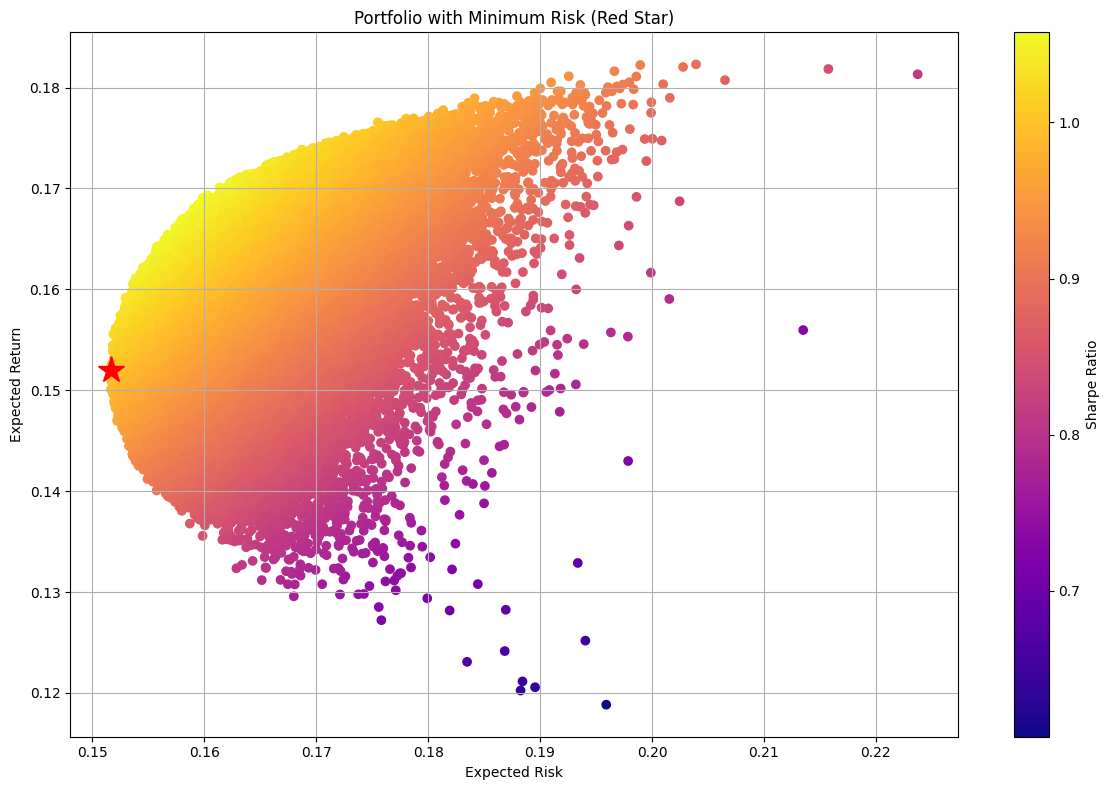

In [31]:
plt.figure(figsize=(12, 8))
plt.scatter(portfolio_risk, portfolio_returns, c=portfolios['Sharpe Ratio'], cmap='plasma')
plt.plot(portfolio_risk[min_risk_index], portfolio_returns[min_risk_index], 'r*', markersize=20)
plt.xlabel('Expected Risk')
plt.ylabel('Expected Return')
plt.title('Portfolio with Minimum Risk (Red Star)')
plt.colorbar(label='Sharpe Ratio')
plt.grid(True)
plt.tight_layout()
plt.show()
